<div align="left">
    <img src="https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/imagenes/email_arriba.png" alt="Texto alternativo" width="50%">


#Creando Nombres

In [1]:
import pandas as pd

In [2]:
#datos extraidos de interner buscadas como apis de nombres
nombres_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?sexo=M&qtd=200")
nombres_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?sexo=F&qtd=200")

In [3]:
type(nombres_f)

pandas.core.frame.DataFrame

In [4]:
print("Cantidad de nombres :" + str(len(nombres_m) + len(nombres_f)))

Cantidad de nombres :400


In [5]:
frames = [nombres_m, nombres_f]
frames

[          nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198    M
 198     ALVARO       0    65444   199    M
 199    GEOVANE       0    65435   200    M
 
 [200 rows x 5 columns],
           nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198 

In [6]:
nombres = pd.concat(frames)['nome'].to_frame()
nombres.columns = ['nombre']
nombres.sample(5)

,nombre
48,RENATO
68,CAIO
61,BIANCA
62,VICTOR
18,VANESSA


In [7]:
nombres.sample(5)

,nombre
82,SOLANGE
67,HENRIQUE
52,LUZIA
146,SAMARA
134,ALBERTO


#Incluyendo ID de alumnos

In [8]:
import numpy as np

In [9]:
np.random.seed(123)

In [10]:
total_alumnos = len(nombres)
total_alumnos

400

In [11]:
nombres['id_alumno'] = np.random.permutation(total_alumnos) + 1
nombres.sample(5)

,nombre,id_alumno
188,VALDECIR,369
57,IGOR,303
3,ANTONIA,382
182,LIDIANE,33
30,ELIANE,111


In [12]:
dominios = ['@dominiodeemail.com', '@serviciodeemail.com']

In [13]:
nombres['dominio'] = np.random.choice(dominios, total_alumnos)
nombres.sample(5)

,nombre,id_alumno,dominio
84,FATIMA,78,@dominiodeemail.com
0,MARIA,331,@serviciodeemail.com
179,LILIANE,340,@dominiodeemail.com
10,LUIS,174,@dominiodeemail.com
171,VALDEMIR,45,@dominiodeemail.com


In [14]:
nombres['email'] = nombres.nombre.str.cat(nombres.dominio).str.lower()
nombres.sample(5)

,nombre,id_alumno,dominio,email
114,ELZA,320,@dominiodeemail.com,elza@dominiodeemail.com
57,IGOR,303,@serviciodeemail.com,igor@serviciodeemail.com
85,FABRICIO,221,@dominiodeemail.com,fabricio@dominiodeemail.com
183,MARLON,8,@dominiodeemail.com,marlon@dominiodeemail.com
189,WESLEI,137,@dominiodeemail.com,weslei@dominiodeemail.com


#Creando Cursos

In [15]:
import html5lib #importar datos de html

In [16]:
url = 'https://www.tiobe.com/tiobe-index/'

In [17]:
cursos = pd.read_html(url)
cursos

[    Jan 2025  Jan 2024  Change  Programming Language Programming Language.1  \
 0          1         1     NaN                   NaN                 Python   
 1          2         3     NaN                   NaN                    C++   
 2          3         4     NaN                   NaN                   Java   
 3          4         2     NaN                   NaN                      C   
 4          5         5     NaN                   NaN                     C#   
 5          6         6     NaN                   NaN             JavaScript   
 6          7        11     NaN                   NaN                     Go   
 7          8         9     NaN                   NaN                    SQL   
 8          9         8     NaN                   NaN           Visual Basic   
 9         10        12     NaN                   NaN                Fortran   
 10        11        13     NaN                   NaN   Delphi/Object Pascal   
 11        12        10     NaN         

In [18]:
type(cursos)

list

In [19]:
cursos = cursos[2].iloc[:,:1]
cursos = cursos.rename(columns={'Programming Language': 'Nome do curso'})#cambio de nombre de la columna
cursos

,Nome do curso
0,Python
1,C++
2,C
3,Java
4,C#
5,JavaScript
6,Go
7,Visual Basic
8,SQL
9,Fortran


In [20]:
type(cursos)

pandas.core.frame.DataFrame

In [21]:
cursos.head()

,Nome do curso
0,Python
1,C++
2,C
3,Java
4,C#


#Adicionando Index

In [22]:
cursos = cursos.rename(columns={'Nome do curso' : 'nombre_curso'})

In [23]:
cursos['id'] = cursos.index + 1
cursos

,nombre_curso,id
0,Python,1
1,C++,2
2,C,3
3,Java,4
4,C#,5
5,JavaScript,6
6,Go,7
7,Visual Basic,8
8,SQL,9
9,Fortran,10


In [24]:
cursos = cursos.set_index('id')#reemplazar el index por el id
cursos.head()

,nombre_curso
id,
1,Python
2,C++
3,C
4,Java
5,C#


In [25]:
cursos.shape

(14, 1)

#Matriculando Alumnos

In [26]:
nombres['matriculas'] = np.ceil(np.random.exponential(size=total_alumnos)*1.5).astype(int)
nombres.head()

,nombre,id_alumno,dominio,email,matriculas
0,JOSE,235,@dominiodeemail.com,jose@dominiodeemail.com,1
1,JOAO,43,@serviciodeemail.com,joao@serviciodeemail.com,1
2,ANTONIO,304,@serviciodeemail.com,antonio@serviciodeemail.com,5
3,FRANCISCO,156,@dominiodeemail.com,francisco@dominiodeemail.com,5
4,CARLOS,343,@serviciodeemail.com,carlos@serviciodeemail.com,1


In [27]:
nombres.matriculas.describe()

count    400.000000
mean       2.135000
std        1.515757
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

In [28]:
import seaborn as sns

C:\Users\angel\AppData\Local\Temp\ipykernel_11484\2267591727.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nombres.matriculas)


<Axes: xlabel='matriculas', ylabel='Density'>

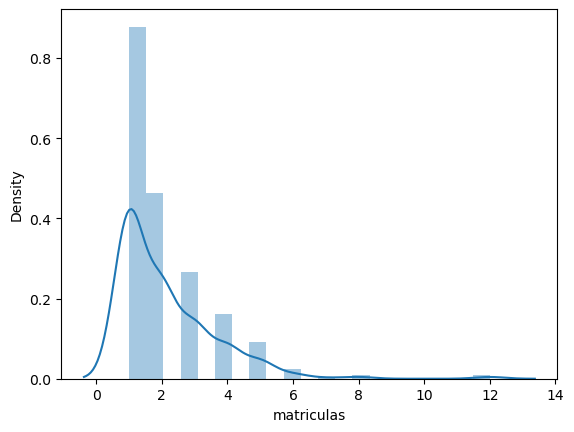

In [29]:
sns.distplot(nombres.matriculas)

In [30]:
nombres.matriculas.value_counts()

matriculas
1     184
2      97
3      56
4      34
5      19
6       5
12      2
8       2
7       1
Name: count, dtype: int64

#Seleccionando Alumnos

In [31]:
nombres.head()

,nombre,id_alumno,dominio,email,matriculas
0,JOSE,235,@dominiodeemail.com,jose@dominiodeemail.com,1
1,JOAO,43,@serviciodeemail.com,joao@serviciodeemail.com,1
2,ANTONIO,304,@serviciodeemail.com,antonio@serviciodeemail.com,5
3,FRANCISCO,156,@dominiodeemail.com,francisco@dominiodeemail.com,5
4,CARLOS,343,@serviciodeemail.com,carlos@serviciodeemail.com,1


In [52]:
cursos.head()

,nombre_curso
id,
1,Python
2,C++
3,C
4,Java
5,C#


In [32]:
todas_matriculas = []
x = np.random.rand(len(cursos))
prob = x / sum(x)
prob

array([1.55122055e-01, 2.35302425e-02, 7.84756795e-02, 3.91167387e-02,
       1.41361544e-01, 7.68603078e-02, 2.57407579e-05, 4.97299010e-02,
       3.84954868e-02, 1.41574295e-02, 1.00510673e-01, 6.38007856e-02,
       4.14548412e-02, 1.77358575e-01])

In [33]:
for index, row in nombres.iterrows():
  id = row.id_alumno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index , p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_alumno', 'id_curso'])
matriculas.head()

,id_alumno,id_curso
0,235,5
1,43,1
2,304,8
3,304,14
4,304,12


In [34]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nombre_curso'])[['nombre_curso', 'id_alumno']].rename(columns={'id_alumno':'Total'}).sort_values('Total', ascending = False)
matriculas_por_curso

,nombre_curso,Total
id_curso,,
14,(Visual) Basic,142
1,Python,138
5,C#,109
11,Ada,88
3,C,73
6,JavaScript,60
12,Lisp,53
13,Objective-C,41
4,Java,38


#Salida en diferentes formatos

In [35]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [36]:
matriculas_por_curso.to_json('matriculas_por_curso.json')

In [37]:
matriculas_por_curso.to_html('matriculas_por_curso.html', index = False)

#Creando Banco SQL

In [38]:
from sqlalchemy import create_engine, MetaData, Table, inspect, text

In [39]:
engine = create_engine('sqlite:///:memory:') # 'postgresql' 'mysql' ///   ruta de mi motor /pat/

Engine(sqlite:///:memory:)

In [40]:
matriculas_por_curso.to_sql('matriculas', engine)

13

In [41]:
insp = inspect(engine)
print(insp.get_table_names())

['matriculas']


#Buscando en Banco SQL

In [42]:
query = 'select * from matriculas where total < 20'

In [43]:
pd.read_sql(sql = text(query), con=engine.connect())

,id_curso,nombre_curso,Total
0,10,Fortran,17


In [44]:
muchas_matriculas = pd.read_sql_table('matriculas', con=engine.connect(), columns=['nombre_curso', 'Total'])
muchas_matriculas #insertar columnas ala seleccion

,nombre_curso,Total
0,(Visual) Basic,142
1,Python,138
2,C#,109
3,Ada,88
4,C,73
5,JavaScript,60
6,Lisp,53
7,Objective-C,41
8,Java,38
9,SQL,35


In [45]:
muchas_matriculas = muchas_matriculas.query('Total > 80')
muchas_matriculas

,nombre_curso,Total
0,(Visual) Basic,142
1,Python,138
2,C#,109
3,Ada,88


#Escribiendo en el Banco SQL

In [46]:
muchas_matriculas.to_sql('muchas_matriculas', engine) #creando nueva tabla

4

In [47]:
insp = inspect(engine) # revisar las tablas creadas
print(insp.get_table_names())

['matriculas', 'muchas_matriculas']


#Nombres para el Ingreso

In [48]:
matriculas.sample(5)

,id_alumno,id_curso
438,230,1
61,12,8
13,310,2
788,312,9
635,363,14


In [49]:
id_curso = 16 #filtro de numero de curso
proxima_clase = matriculas.query('id_curso == {}'.format(id_curso)) #filtro por query = a id_curso
proxima_clase

,id_alumno,id_curso


In [50]:
proxima_clase.set_index('id_alumno').join(nombres.set_index('id_alumno'))['nombre'].to_frame()#solo la columna nombre


,nombre
id_alumno,


In [ ]:
nombre_aula = cursos.loc[id_curso]
nombre_aula

KeyError: 'id_curso'

In [ ]:
nombre_aula = nombre_aula.nombre_curso
nombre_aula

'Estatística básica'

In [ ]:
proxima_clase = proxima_clase.set_index('id_alumno').join(nombres.set_index('id_alumno'))['nombre'].to_frame()

In [ ]:
proxima_clase = proxima_clase.rename(columns={'nombre': 'Alumnos del curso de {}'.format(nombre_aula)})#dataframe nombre_aula
proxima_clase.sample(5)

,Alumnos del curso de Estatística básica
id_alumno,
49,LEONARDO
315,LILIAN
38,ALVARO
336,JOSEFA
251,CRISTINA


#Excel

In [ ]:
proxima_clase.to_excel('proxima_clase.xlsx', index = False)

In [ ]:
pd.read_excel('proxima_clase.xlsx')

,Alumnos del curso de Estatística básica
0,RODRIGO
1,ALVARO
2,LEONARDO
3,JAIME
4,JAIME
5,ANDERSON
6,HENRIQUE
7,CRISTINA
8,GERALDO
9,ROBERTA


[<div align="left">
    <img src="https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/imagenes/email_abajo.png" alt="Texto alternativo" width="50%">](https://bootcampxperience.com/)